## Require Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gc

## Balance dataset using Smote

In [2]:
# Load csv
df = pd.read_csv("Final_Training_V01.csv")

In [3]:
X_raw = df.copy()
X_raw.drop(columns=["is_duplicate"], inplace=True)
y_raw = df["is_duplicate"]

In [4]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy="minority")
X, y = over.fit_resample(X_raw, y_raw)

In [5]:
gc.collect()

15

## Normalize Data

In [6]:
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
X_normalized = sc.fit_transform(X)

In [7]:
# Seed for reproducability
seed = 1234
np.random.seed(seed)
x_train_normalized, x_test_normalized, y_train, y_test = train_test_split(X_normalized, 
                                                      y, 
                                                      test_size=0.20, 
                                                      random_state=seed)

### x_train, y_train dataset will use to train the model to get f(X)
### y_test is actual target which will be used to compare with predicted class lavel
### x_test will be used to get the prediction
### model error = log-loss

In [8]:
#x_train_normalized
#x_test_normalized
#y_train

In [9]:
#Reference: https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr

from collections import Counter

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.5001792087245547 Class 1:  0.4998207912754453
---------- Distribution of output variable in train data ----------
Class 0:  0.5007168327022755 Class 1:  0.5007168327022755


In [10]:
#Reference: https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(y_test, y_predict):
    C = confusion_matrix(y_test, y_predict)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Random Model

### The model KPI is log-loss and log-loss can lie between 0 to infinity.
### For every xi we are generating yi_hat randomly to find the worst case for our project model. Given a random model the log-loss will describe how worse the model can go. So any descent model that we built, the log-loss value should lie between 0 to 0.88. The model loss closer to 0 is best model and closer to 0.88 is worse model. If any model that gives log-loss more than 0.88 that means that model is more worse than our dumb/random model. 

Log loss on test Data using Random Model 0.8874844593061338


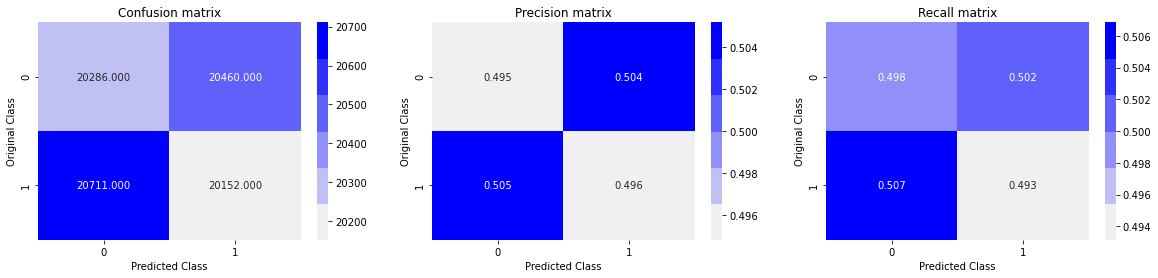

In [11]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum

# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns


random_predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    random_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on test Data using Random Model",log_loss(y_test, random_predicted_y, eps=1e-15))

random_predicted_y =np.argmax(random_predicted_y, axis=1)
plot_confusion_matrix(y_test, random_predicted_y)

### All the points that belong to class 0, roughly about half of them predicted belong to class 0, and half of them belong to class1.
### In the precision matrix, the column sum = 1; it says that all the predicted point that belongs to class 0 is, about 63% actually belongs to class 0, and 37% belongs to class 1. The diagonal value is precision to class 0 and class1
### The recall matrix the row sums to 1. It says here that of all the points that belong to class 0, the random model predicted that 50% belong to class 0 and 50% belong to class 1. The diagonal value is the recall value.

# Logistic Regression

## Dimensionality reduction using TSVD

In [12]:
from sklearn.decomposition import TruncatedSVD

n_components = 300
svd_x_train = TruncatedSVD(n_components=n_components)
svd_x_train.fit(x_train_normalized)

svd_x_test = TruncatedSVD(n_components=n_components)
svd_x_test.fit(x_test_normalized)

x_train_after_svd = svd_x_train.transform(x_train_normalized)
x_test_after_svd = svd_x_train.transform(x_test_normalized)

In [13]:
x_train_after_svd.shape, y_train.shape

((326435, 300), (326435,))

## LR model with dimensionsionalty reduction

Time taken for Logistic Regression to train after TSVD : 4.351619750000012
Time taken for Logistic Regression to train after TSVD, calibration : 9.772537041999996


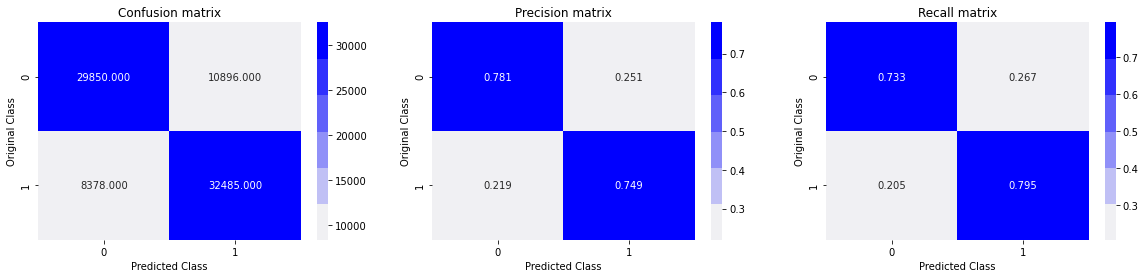

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

start = timer()
clf = LogisticRegression(random_state=0).fit(x_train_after_svd, y_train)

clf = SGDClassifier(alpha=0.1, penalty='l2', loss='log', random_state=42)
clf.fit(x_train_after_svd, y_train)
print("Time taken for Logistic Regression to train after TSVD :", timer()-start)

start = timer()

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_after_svd, y_train)

print("Time taken for Logistic Regression to train after TSVD, calibration :", timer()-start)
clf_tsvd_predict = clf.predict(x_test_after_svd)

plot_confusion_matrix(y_test, clf_tsvd_predict)

In [15]:
from sklearn.metrics import roc_auc_score

print("\nClassification Report: \n", classification_report(y_test, clf_tsvd_predict))
print("\nLog loss of LR Model after dimensionalty reduction is",log_loss(y_test, clf_tsvd_predict, eps=1e-15))
print("\nAccuracy Score: ", accuracy_score(y_test, clf_tsvd_predict))
print("\nAUC: ", roc_auc_score(y_test, clf_tsvd_predict))


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.73      0.76     40746
           1       0.75      0.79      0.77     40863

    accuracy                           0.76     81609
   macro avg       0.76      0.76      0.76     81609
weighted avg       0.76      0.76      0.76     81609


Log loss of LR Model after dimensionalty reduction is 8.157299913601538

Accuracy Score:  0.7638250683135438

AUC:  0.7637803478451886


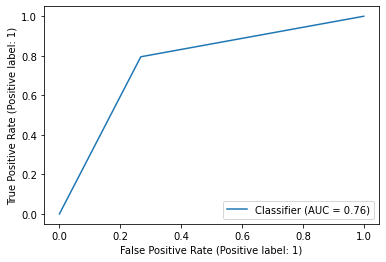

In [16]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_predictions(y_test, clf_tsvd_predict)
plt.savefig('ROC', dpi=300)
plt.show()

## LR Model without dimensionality reduction

/Users/ritu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time taken for Logistic Regression to train without dimensionality reduction : 12.619624707999975
Time taken for Logistic Regression to train without dimensionality reduction, with calibration : 20.822858416999992


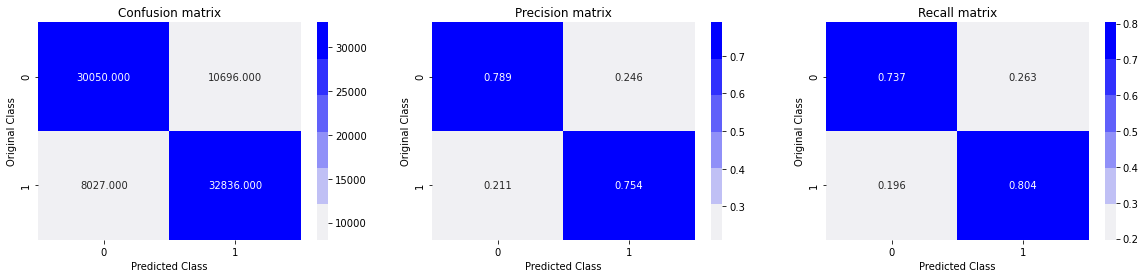

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

start = timer()
clf = LogisticRegression(random_state=0).fit(x_train_normalized, y_train)

clf = SGDClassifier(alpha=0.1, penalty='l2', loss='log', random_state=42)
clf.fit(x_train_normalized, y_train)

print("Time taken for Logistic Regression to train without dimensionality reduction :", timer()-start)
start = timer()

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_normalized, y_train)

print("Time taken for Logistic Regression to train without dimensionality reduction, with calibration :", timer()-start)
clf_predict = clf.predict(x_test_normalized)

plot_confusion_matrix(y_test, clf_predict)

In [18]:
print("\nClassification Report: \n", classification_report(y_test, clf_predict))
print("\nLog loss of LR Model without dimensionalty reduction is",log_loss(y_test, clf_predict, eps=1e-15))
print("\nAccuracy Score: ", accuracy_score(y_test, clf_predict))
print("\nAUC: ", roc_auc_score(y_test, clf_predict))


Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76     40746
           1       0.75      0.80      0.78     40863

    accuracy                           0.77     81609
   macro avg       0.77      0.77      0.77     81609
weighted avg       0.77      0.77      0.77     81609


Log loss of LR Model without dimensionalty reduction is 7.9241022796018346

Accuracy Score:  0.7705767746204463

AUC:  0.7705294153329013


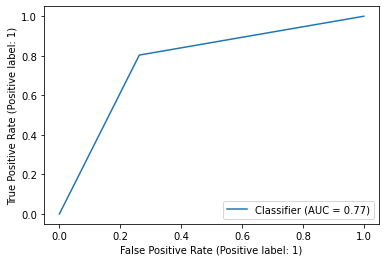

In [19]:
RocCurveDisplay.from_predictions(y_test, clf_predict)
plt.savefig('ROC', dpi=300)
plt.show()

In [20]:
#Clear the memory with Garbage Collect
gc.collect()

29834

## Logistic Regression with Hyperparamerters Tuning without dimensionality reduction

For values of alpha =  1e-05 The log loss is: 0.42558901707847835
For values of alpha =  0.0001 The log loss is: 0.4110768834756563
For values of alpha =  0.001 The log loss is: 0.40734104414714994
For values of alpha =  0.01 The log loss is: 0.42050589683651657
For values of alpha =  0.1 The log loss is: 0.4594209104124339
For values of alpha =  1 The log loss is: 0.5072651477021474
For values of alpha =  10 The log loss is: 0.5555463115016502


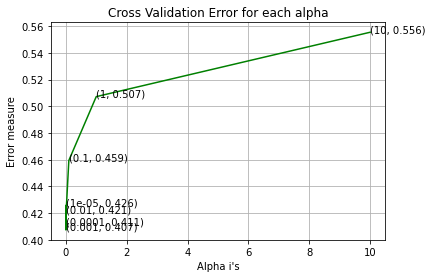

Time taken for grid search: 575.032792125
Time taken for best LR model: 7.70161250000001
Time taken for calibrated: 35.385752000000025
For values of best alpha =  0.001 The train log loss is: 0.40890907298323065
For values of best alpha =  0.001 The test log loss is: 0.40734104414714994
Total number of data points : 81609


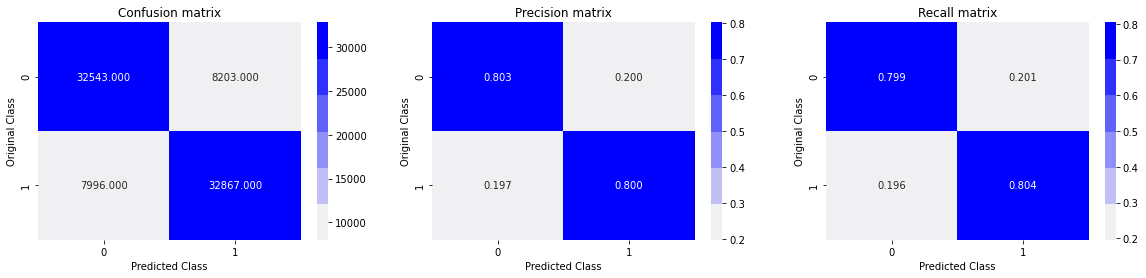

In [21]:
#Reference: https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
start_grid = timer()
        
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)


log_error_array=[]
for i in alpha:
    #when we have sgd classifier with log-loss then it is called logistic regression, penalty is regularizer
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train_normalized, y_train)
    #wherever we got log-loss we need to caliberate the model
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_normalized, y_train)
    predict_y = sig_clf.predict_proba(x_test_normalized)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

print("Time taken for grid search:", timer()-start_grid)

best_alpha = np.argmin(log_error_array)

start = timer()

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train_normalized, y_train)

print("Time taken for best LR model:", timer()-start)

start = timer()

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_normalized, y_train)

print("Time taken for calibrated:", timer()-start)

predict_y = sig_clf.predict_proba(x_train_normalized)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(x_test_normalized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

plot_confusion_matrix(y_test, predicted_y)

In [22]:
print("\nClassification Report: \n", classification_report(y_test, predicted_y))
print("\nAccuracy Score: ", accuracy_score(y_test, predicted_y))
print("\nAUC: ", roc_auc_score(y_test, predicted_y))


Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80     40746
           1       0.80      0.80      0.80     40863

    accuracy                           0.80     81609
   macro avg       0.80      0.80      0.80     81609
weighted avg       0.80      0.80      0.80     81609


Accuracy Score:  0.8015047359972552

AUC:  0.801500691531756


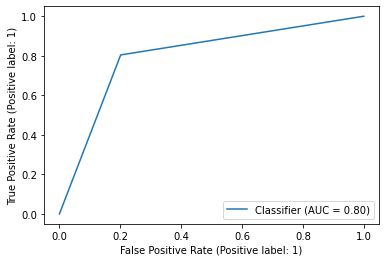

In [23]:
RocCurveDisplay.from_predictions(y_test, predicted_y)
plt.savefig('ROC', dpi=300)
plt.show()

### We perform a simple grid search for alpha values e^-10 to 10. 
### The best parameter for the LR model is alpha = 0.01, L2 regularizer = 12, the lowest train log-loss is 0.4088 and test log-loss 0.4079, and the model doesn't overfit. 
### Probably, the model is underfitting, but not sure about it as the log loss in the random model was 0.88 and LR model 0.40; however, the model could have achieved a much lower log loss value. If other models achieve low log-loss, we can say the Logistic Regression model is underfitting.

## Test the model with unseen data to make it ready as production level

In [24]:
df = pd.read_csv("Final_Test_V01.csv")

#Read all features except Target features as X
#Read target feature as y
x_final_test = df.drop('is_duplicate',axis=1).to_numpy()
y_final_test = df['is_duplicate'].to_numpy()

In [25]:
#Normalize the Data
sc = StandardScaler()
x_test_normalized = sc.fit_transform(x_final_test)

In [26]:
y_pred = clf.predict(x_test_normalized)
y_pred_prob = clf.predict_proba(x_test_normalized)

In [27]:
print("Time taken to train model with test/unseen data :", timer()-start)
print("\nClassification Report: \n", classification_report(y_final_test, y_pred))
print("\nLog loss on test Data using best Model",log_loss(y_final_test, y_pred, eps=1e-15))
print("\nAccuracy Score: ", accuracy_score(y_final_test, y_pred))
print("\nAUC: ", roc_auc_score(y_final_test, y_pred))

Time taken to train model with test/unseen data : 45.46149308300005

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.72      0.80     51005
           1       0.65      0.87      0.74     29853

    accuracy                           0.78     80858
   macro avg       0.78      0.80      0.77     80858
weighted avg       0.81      0.78      0.78     80858


Log loss on test Data using best Model 7.643623833583663

Accuracy Score:  0.7786984590269361

AUC:  0.7982057715587478


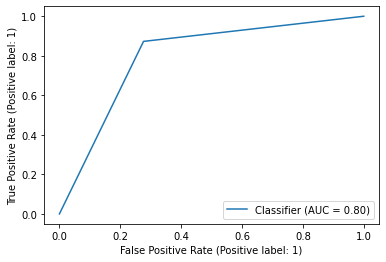

In [28]:
RocCurveDisplay.from_predictions(y_final_test, y_pred)
plt.savefig('ROC', dpi=300)
plt.show()

Reference:
https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr
https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr
https://stackoverflow.com/a/18662466/4084039
https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr